   Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0        1052  2023-02-03       Bob  North       5053.97             18   
1        1093  2023-04-21       Bob   West       4384.02             17   
2        1015  2023-09-21     David  South       4631.23             30   
3        1072  2023-08-24       Bob  South       2167.94             39   
4        1061  2023-03-24   Charlie   East       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  
0           Cash        Online            North-Bob  
1           Cash        Re

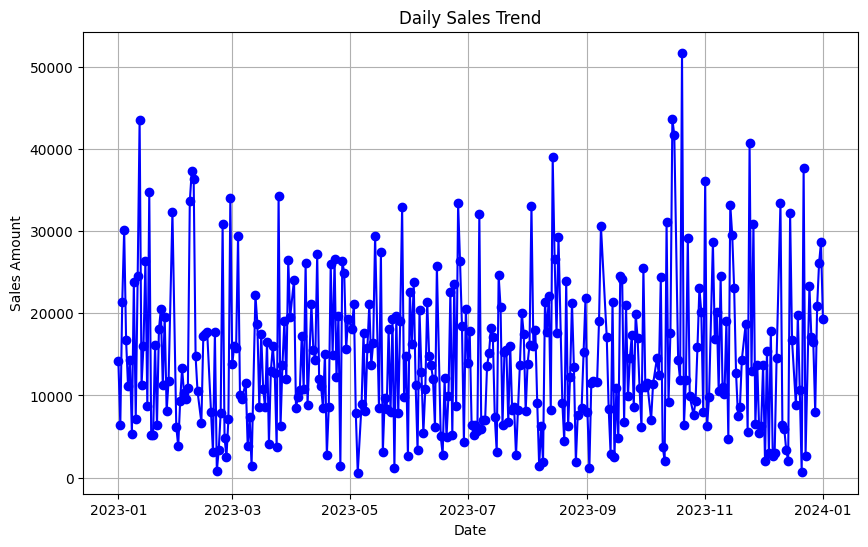

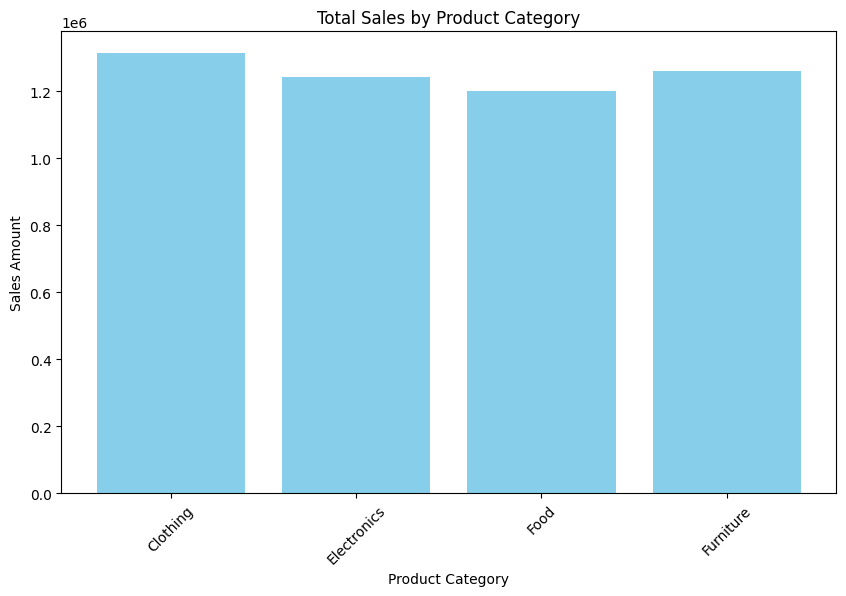

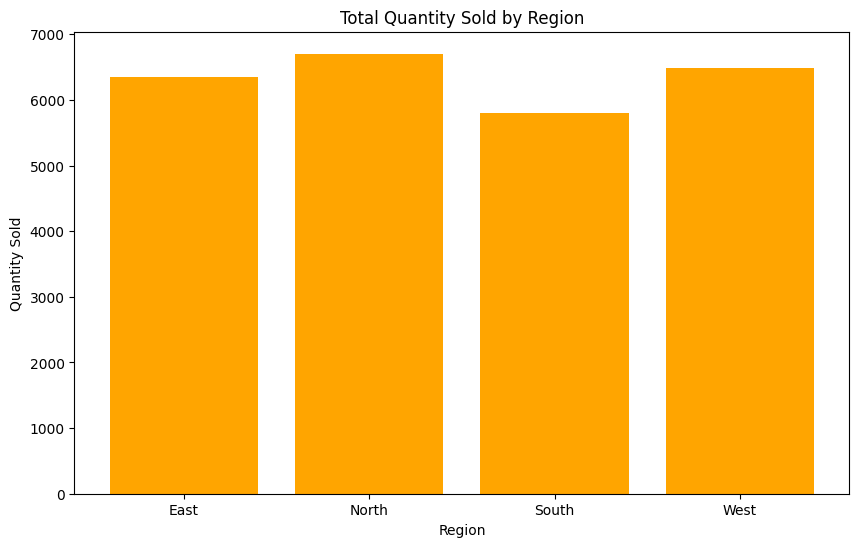

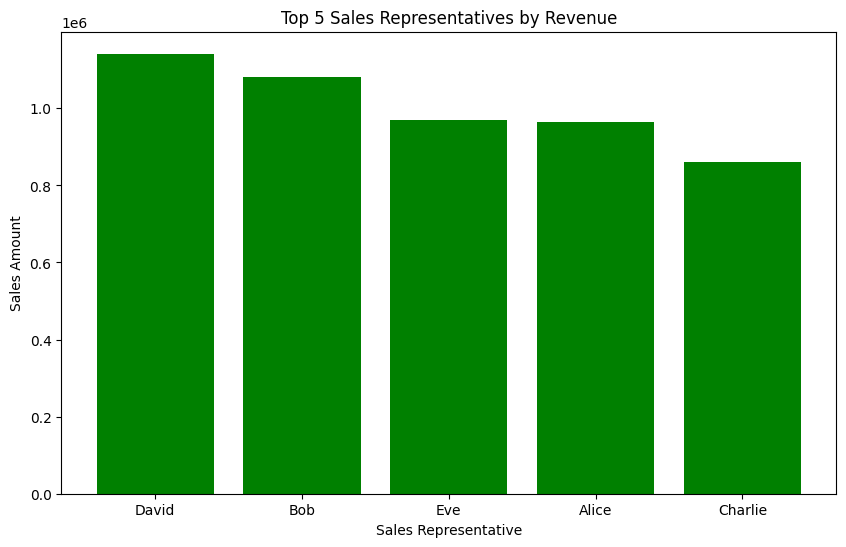

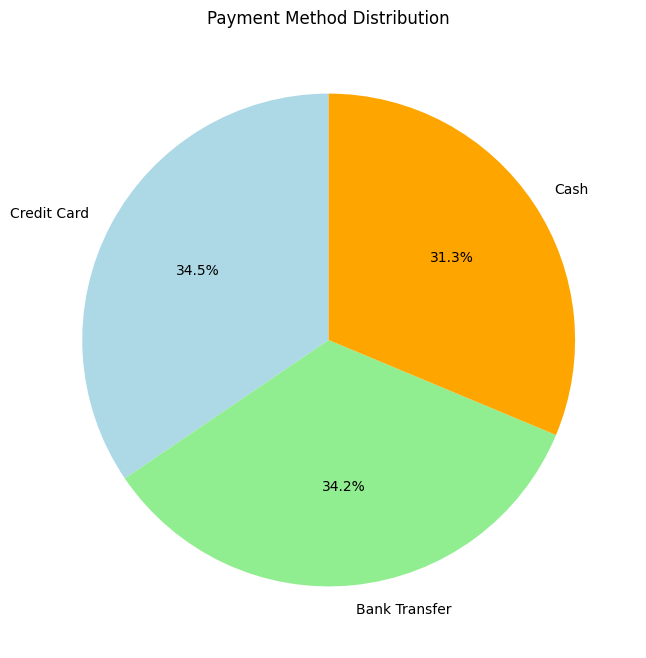

In [12]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load Dataset
# Replace 'sales_data.csv' with your CSV file name
data = pd.read_csv("sales_data.csv")

# Step 3: Check first few rows
print(data.head())

# Step 4: Dataset Info
print(data.info())
print(data.describe())

# Step 5: Clean Data
data = data.dropna()

# Step 6: Sales Trend Over Time
data['Sale_Date'] = pd.to_datetime(data['Sale_Date'])
daily_sales = data.groupby('Sale_Date')['Sales_Amount'].sum()

# Plot 1: Sales Trend
plt.figure(figsize=(10,6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='blue')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.show()

# Step 7: Sales by Product Category
plt.figure(figsize=(10,6))
product_sales = data.groupby("Product_Category")["Sales_Amount"].sum()
plt.bar(product_sales.index, product_sales.values, color='skyblue')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()

# Step 8: Quantity Sold by Region
plt.figure(figsize=(10,6))
region_qty = data.groupby("Region")["Quantity_Sold"].sum()
plt.bar(region_qty.index, region_qty.values, color='orange')
plt.title("Total Quantity Sold by Region")
plt.xlabel("Region")
plt.ylabel("Quantity Sold")
plt.show()

# Step 9: Top 5 Sales Reps by Revenue
plt.figure(figsize=(10,6))
top_reps = data.groupby("Sales_Rep")["Sales_Amount"].sum().sort_values(ascending=False).head(5)
plt.bar(top_reps.index, top_reps.values, color='green')
plt.title("Top 5 Sales Representatives by Revenue")
plt.xlabel("Sales Representative")
plt.ylabel("Sales Amount")
plt.show()



# Step 11: Payment Method Distribution
plt.figure(figsize=(8,8))
payment_counts = data['Payment_Method'].value_counts()
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue','lightgreen','orange','pink','yellow'])
plt.title("Payment Method Distribution")
plt.show()
